In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [2]:
df = pd.read_csv("/Users/meetsudra/Documents/GitHub/timeseries/datasets/CO2 Concentration.csv")
df.head()

,Year,Month,CO2 Concentration
0,1975,1,330.62
1,1975,2,331.40
2,1975,3,331.87
3,1975,4,333.18
4,1975,5,333.92


In [8]:
df['Date'] = df['Year'].astype(str)+'-'+df['Month'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df.drop(columns=['Month','Year'],inplace=True)

In [9]:
df.head()

,CO2 Concentration,Date
0,330.62,1975-01-01
1,331.40,1975-02-01
2,331.87,1975-03-01
3,333.18,1975-04-01
4,333.92,1975-05-01


In [15]:
df = df.set_index('Date')

In [16]:
df.head()

,CO2 Concentration
Date,
1975-01-01,330.62
1975-02-01,331.40
1975-03-01,331.87
1975-04-01,333.18
1975-05-01,333.92


<Axes: xlabel='Date', ylabel='CO2 Concentration'>

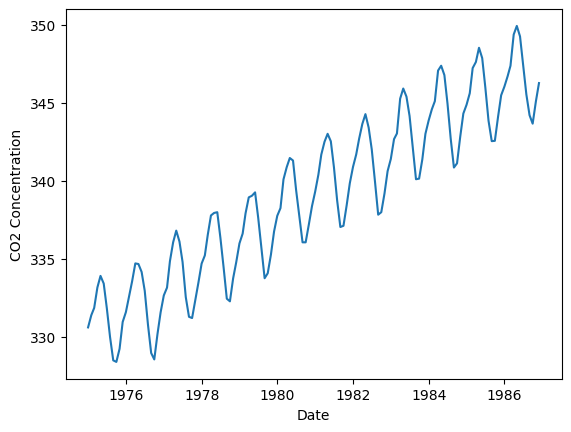

In [17]:
sns.lineplot(df['CO2 Concentration'])

We see a increasing trend which seems constant with a constant seasonality 

In [23]:
# Lets check it using PymannKendall test 
import pymannkendall as mk 

mk.original_test(df['CO2 Concentration'])

# Yes there is a increasing trend!

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=13.22737013469656, Tau=0.7438811188811189, s=7659.0, var_s=335184.3333333333, slope=0.11999999999999982, intercept=330.545)

Now, Statistically how can u determine whether the time series data is stationary?

There are two tests!
1. ADF 
2. KPSS

(Difference between two test is in their hypothesis)

### ADF test 

Null Hypothesis (H0) : Series is non stationary, or series has a unit root 

Alternate Hypothesis (Ha) : Series is stationary, or series has no unit root 

if p-value < 0.5 then reject H0

In [25]:
from statsmodels.tsa.stattools import adfuller 

adftest = adfuller(df['CO2 Concentration'])
print(adftest)


(-0.612294140001057, 0.8681797862771405, 14, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 100.38999626540178)


Here the second value is the p-value which is greater the 0.5 and hence we fail to reject Null Hypothesis # That is series is non stationary

### KPSS test 
Null Hypothesis (H0) : The series is Stationary or has no unit root 

Alternate Hypothesis (Ha) : The series is Non-Stationary or has unit root 

If p-value<0.5 then reject Null Hypothesis

In [28]:
from statsmodels.tsa.stattools import kpss

result = kpss(df['CO2 Concentration'])
result[1] # p-value in the tuple

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1152/1881287843.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['CO2 Concentration'])


0.01

Here the p-value is less then 0.5 thus we reject the null hypothesis. Thus Series is Non-stationary 

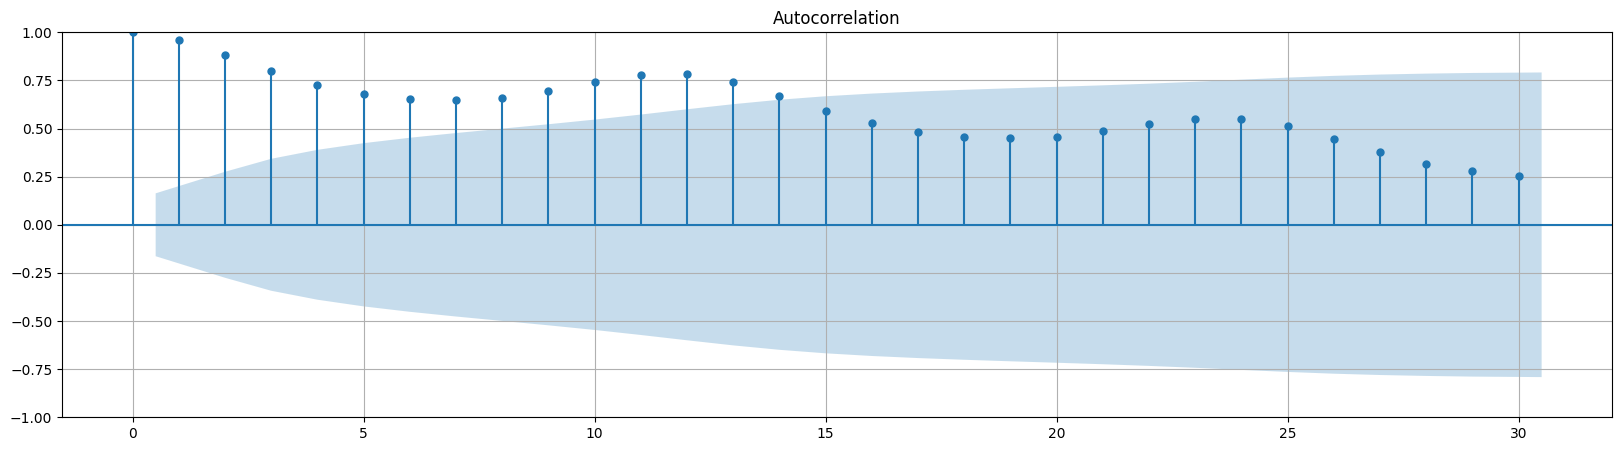

In [29]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20,5))
plot_acf(df['CO2 Concentration'], ax=plt.gca(), lags=30)

plt.grid()
plt.show()
